# Praktikum / Live-Coding

## NLP: TF-IDF, n-grams und sentiment analysis

In [47]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Ziel: Sentiment Analysis von Filmkritiken

Wir wollen für kurze Filmkritiken in Textform vorhersagen ob diese positiv oder negativ sind.

### Daten: IMDB movie review dataset

Wir arbeiten zu diesem Zweck mit dem *IMDB movie review dataset*. Darin befinden sich 40 000 Kritiken von der Seite *IMDB* die als negativ (<= 4/10) oder positiv (>= 7/10) gelabeld wurden.

### Quellen:
Die Daten befinden sich auf Moodle (`movie_reviews_train.csv`) und stammen von Kaggle [Link zum Datensatz](https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format?datasetId=429163&sortBy=voteCount).

Ursprünglich kommen die Daten aber hierher: https://ai.stanford.edu/~amaas/data/sentiment/

## Importieren und erstes Erkunden
- Fehlen Einträge?
- Gibt es offensichtlich merkwürdige Einträge?
- Sind die möglichen Label (positiv/negativ) gut verteilt?

In [48]:
filename = "data/movie_review_train.csv"  # Pfad entsprechend anpassen

data = pd.read_csv(filename)
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


array([[<AxesSubplot: title={'center': 'label'}>]], dtype=object)

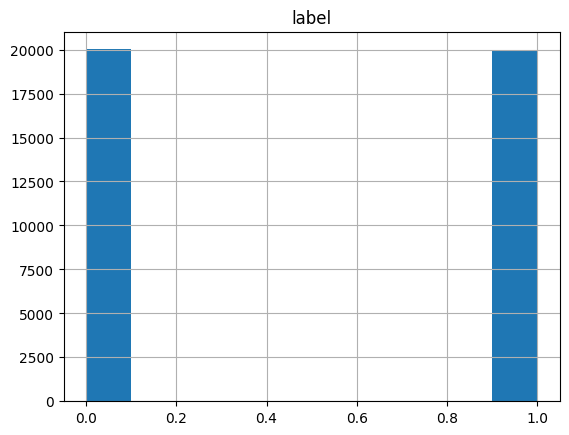

In [50]:
data.hist()

## Find your own way...

`Scikit-Learn` hat (wie so oft) einige nützliche Funktionen für uns, auch im Bereich NLP. Hier soll es um das Berechnen von tf-idf Werten gehen und dafür gibt es den `TfidfVectorizer`.

Siehe die Dokumentation hier: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidf#sklearn.feature_extraction.text.TfidfVectorizer

- Was machen `min_df` und `max_df` ?
- Versuche den "Korpus" (data.text) mit dem `TfidfVectorizer` in ein Array aus Feature-Vektoren umzuwandeln (siehe Dokumentation), z.B. mit `min_df=2, max_df = 0.5`.
- Wie viele Features bekommen wir?
- Schaue dir die Feature-Namen an mit `.get_feature_names()`

In [51]:
#min_df und max_df ignorieren Woerter die ueber oder unter der jeweilig eingestellten document_frequency Grenze liegen.
#dafuer wird ueberprueft wie oft ein wort in den dokumenten auftaucht 
 

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = data["text"]
vectorizer = TfidfVectorizer(min_df=2, max_df=0.5)
X = vectorizer.fit_transform(corpus) #gibt eine matrix wieder die das tf-idf gewicht den gelernten Woertern gegenueberstellt


In [52]:
vectorizer.get_feature_names_out() #die woerter die gelernt wurden

array(['00', '000', '001', ..., 'être', 'óli', 'über'], dtype=object)

## unnötige Features sind immer noch enhalten (00,000 etc). Weiter min_df, mx_df anpassen

In [53]:
len(vectorizer.get_feature_names_out())

54699

In [54]:
X[0, :].data #die tf-idf gewichte des ersten dokuments

array([0.11836246, 0.11870748, 0.07312602, 0.32629579, 0.13594002,
       0.16575384, 0.12892531, 0.1058932 , 0.05484226, 0.08566274,
       0.09333894, 0.09450528, 0.0957133 , 0.06727243, 0.11262561,
       0.06277901, 0.06590715, 0.10494055, 0.08205413, 0.0706279 ,
       0.04783831, 0.15711823, 0.08276667, 0.06413905, 0.09450784,
       0.10501791, 0.13971231, 0.06018946, 0.12422222, 0.06101891,
       0.04658475, 0.08634257, 0.07688949, 0.15268291, 0.09874191,
       0.06587649, 0.0991206 , 0.07223305, 0.05777286, 0.0909172 ,
       0.04137824, 0.10403872, 0.07773267, 0.12521693, 0.05550897,
       0.06093868, 0.03560814, 0.08726658, 0.13546378, 0.04027541,
       0.07213299, 0.06692675, 0.03255281, 0.10418572, 0.03918796,
       0.03593453, 0.03114071, 0.08756773, 0.03594235, 0.06992279,
       0.07081143, 0.07776357, 0.07179279, 0.0290957 , 0.07960842,
       0.02979127, 0.05205563, 0.12521693, 0.09715987, 0.03581252,
       0.08940421, 0.03180394, 0.14814785, 0.13588491, 0.04198

In [55]:
X

<40000x54699 sparse matrix of type '<class 'numpy.float64'>'
	with 4687759 stored elements in Compressed Sparse Row format>

In [56]:
X.shape

(40000, 54699)

# Machine Learning --> Sentiment Analysis

Um die Labels (1/0 also positiv/negativ) vorherzusagen soll ein *logistic regression* Modell trainiert und getestet werden!

#### Erstellung des Trainingsdatenses


In [57]:
y_train = data["label"]

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X,y_train)

LogisticRegression(random_state=42)

## Modell testen
Um das trainierte Modell zu testen nehmen wir einen (dem Modell noch unbekannten) Datensatz: `movie_reviews_test.csv`.

- Sage die Label für die Test-Daten vorher
- Messe die Genauigkeit mit `from sklearn.metrics import accuracy_score`
- Erstelle eine Konfusionsmatrix (`from sklearn.metrics import confusion_matrix`)

In [59]:
filename = "data/movie_review_test.csv"  # Pfad entsprechend anpassen

data_test = pd.read_csv(filename)
data_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [60]:
test_corpus = data_test["text"]
X_test = vectorizer.transform(test_corpus)
y_test = data_test["label"]

In [61]:
predictions = model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#calculate accuracy score
accuracy_score(y_test, predictions)


0.8986

In [63]:
#calculate confusion matrix
confusion_matrix(y_test, predictions)

array([[2212,  283],
       [ 224, 2281]], dtype=int64)

## Modell interpretieren

Einer der Vorteile von *logistic regression* ist, dass wir uns anschauen können was das Modell wirklich "gelernt" hat. Dazu können wir die gelernten Koeffizienten ausgeben mit `model.coef_`

- Welche Wörter sind am wichtigsten für eine negative oder positive Bewertung (je die Top-10 anzeigen)

In [64]:
model.coef_.shape

(1, 54699)

In [65]:
model.coef_[0, :]

array([-0.22320701, -0.457677  , -0.03174684, ..., -0.17784228,
        0.07222799, -0.05257983])

In [66]:
indices_of_most_important_words_for_positiv_label = np.argsort(model.coef_[0,:])[-10:] #argsort sortiert die werte von klein nach gross und gibt die indices zurueck
indices_of_most_important_words_for_positiv_label

array([19355, 53145,  6459, 28918, 35898,  1968, 53824,  4935, 16769,
       20914], dtype=int64)

In [67]:
indices_of_most_important_words_for_negativ_label = np.argsort(model.coef_[0,:])[:10]
indices_of_most_important_words_for_negativ_label

array([53966,  3810, 52884,  3648,  5984, 37057, 48454, 33583, 23155,
       14895], dtype=int64)

In [68]:
#anhand der indices die woerter ausgeben
for index in indices_of_most_important_words_for_positiv_label:
    print(vectorizer.get_feature_names_out()[index])

fun
well
brilliant
loved
perfect
amazing
wonderful
best


excellent
great


In [69]:
for index in indices_of_most_important_words_for_negativ_label:
    print(vectorizer.get_feature_names_out()[index])

worst
bad


waste
awful
boring
poor
terrible
nothing
horrible
dull


# Vergleich: 2-grams, 3-grams...

Bisher haben wir nur mit 1-grams gearbeitet (also einzelnen Wörtern). Wir können aber auch die Häufigkeiten der 2-grams etc. zählen und hinzunehmen. Dazu einfach den Parameter `ngram_range` auf z.B. `(1, 2)` (1-grams und 2-grams).

Da es dadurch deutlich mehr Terme gibt, sollten dann aber auch min_df und max_df angepasst werden, z.B `min_df=6` oder 10...

- Gibt das eine bessere Vorhersage der Labels?

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = data["text"]
vectorizer = TfidfVectorizer(min_df=6, max_df=0.5, ngram_range=(1,2)) #ngram_range gibt an wieviele Wörter zusammengefasst werden sollen
X = vectorizer.fit_transform(corpus) #gibt eine matrix wieder die das tf-idf gewicht den gelernten Wörtern gegenueberstellt


In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X,y_train)

LogisticRegression(random_state=42)

In [72]:
test_corpus = data_test["text"]
X_test = vectorizer.transform(test_corpus)
y_test = data_test["label"]

In [73]:
len(vectorizer.get_feature_names_out())

189502

In [74]:
X.shape

(40000, 189502)

## Check Model Performance

In [75]:
predictions = model.predict(X_test)

#### Accuracy

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9052

### Confusion Matrix

In [77]:
confusion = confusion_matrix(y_test, predictions)
confusion

array([[2224,  271],
       [ 203, 2302]], dtype=int64)

In [78]:
model.coef_.shape

(1, 189502)

In [79]:
model.coef_[0, :]

array([-0.08148471,  0.05986044, -0.06256453, ...,  0.00771762,
        0.0576624 , -0.03740848])

In [80]:
indices_of_most_important_words_for_positiv_label = np.argsort(model.coef_[0,:])[-10:] #argsort sortiert die werte von klein nach gross und gibt die indices zurueck
indices_of_most_important_words_for_positiv_label

array([ 96360,  96222,  62801, 155572,   6666, 121551,  23294, 186123,
        53299,  67027], dtype=int64)

In [81]:
indices_of_most_important_words_for_negativ_label = np.argsort(model.coef_[0,:])[:10]
indices_of_most_important_words_for_negativ_label

array([ 19187, 186894,  18817, 161600,  25613, 179061, 124405, 152958,
       109884, 108246], dtype=int64)

In [82]:
#anhand der indices die woerter ausgeben
for index in indices_of_most_important_words_for_positiv_label:
    print(vectorizer.get_feature_names_out()[index])

loved
love
fun
the best
amazing
perfect
best
wonderful
excellent
great


In [83]:
for index in indices_of_most_important_words_for_negativ_label:
    print(vectorizer.get_feature_names_out()[index])

bad
worst
awful
the worst
boring
waste
poor
terrible
nothing
no


#### Learning:
N-grams sind nützlich, um in der Textverarbeitung die Feature-Extration zu verbessern. Damit das Modell trainiert werden kann, müssen die Textdaten in numerische Form gebracht werden. TFIDF ist ein gutes Beispiel die wichtigsten Wörter für das Model Training zu ermitteln und in Zahlen umzuwandeln. 
1. Schritt: Vektorizer trainieren und Matrix erstellen die den wichtigsten Wörter Gewichtungen gegenüberstellt. 
    - n-grams verwenden um Wortbeziehungen zu betonen
    - min_df, max_df verwenden, um Stopwords zu filtern
2. Schritt: Entsprechendes Modell mit Matrix trainieren
3. Schritt: Testdaten mit Vektorizer in TFIDF Martix umwandeln
4. Schritt: Vorhersagen
5. Schritt: Auswerten (Acc, Conf)  

(Zusätzliche Optmierung wäre eine Lemmatization vor dem Training des Vectorizers zu verwenden.)